In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import json
import requests
import sys
import pickle
from selenium import webdriver

In [6]:
opt = webdriver.ChromeOptions()
opt.add_extension("Block-image_v1.1.crx")
driver = webdriver.Chrome(chrome_options=opt)

In [3]:
# starting page
url_tech_live = 'https://www.kickstarter.com/discover/advanced.json?state=live&category_id=16&woe_id=0&sort=newest'
url_tech_successful = 'https://www.kickstarter.com/discover/advanced?state=successful&category_id=16&sort=newest'

In [7]:
from collections import defaultdict
import sys

# total number of search results for projects
def get_number_of_hits(d):
    number_of_hits = driver.find_element_by_xpath('//*[@id="projects"]/div[2]/h3/b')
    return int(number_of_hits.text.split(' ')[0].replace(',',''))

def get_project_data(d, base_url):

    d.get(base_url.replace('.json', ''))
    number_of_hits = get_number_of_hits(d)
    print 'Extracting data for %d projects' % number_of_hits

    # determine number of pages
    results_per_page = 20
    number_of_pages = int(np.ceil(number_of_hits / results_per_page)) + 1 # add extra page for margin

    output_dict = defaultdict(dict)
    for page in range(number_of_pages):
        try:
            print 'Extracting page %d of %d' % (page, number_of_pages)
            sys.stdout.flush()

            page_url = base_url + '&page=%d' % page
            url_text = requests.get(page_url).text
            url_json = json.loads(url_text)

            for proj in url_json['projects']:
                # get project, assume 'id' is a unique key
                key = proj['id']
                output_dict.update({key:proj})
        except ValueError:
            print "Error on page %d" % page
    print 'Finished page %d of %d total' % (page, number_of_pages - 1)
    return output_dict                        

In [8]:
tech_projects_live = get_project_data(driver, url_tech_live)

Extracting data for 896 projects
Extracting page 0 of 45
Extracting page 1 of 45
Extracting page 2 of 45
Extracting page 3 of 45
Extracting page 4 of 45
Extracting page 5 of 45
Extracting page 6 of 45
Extracting page 7 of 45
Extracting page 8 of 45
Extracting page 9 of 45
Extracting page 10 of 45
Extracting page 11 of 45
Extracting page 12 of 45
Extracting page 13 of 45
Extracting page 14 of 45
Extracting page 15 of 45
Extracting page 16 of 45
Extracting page 17 of 45
Extracting page 18 of 45
Extracting page 19 of 45
Extracting page 20 of 45
Extracting page 21 of 45
Extracting page 22 of 45
Extracting page 23 of 45
Extracting page 24 of 45
Extracting page 25 of 45
Extracting page 26 of 45
Extracting page 27 of 45
Extracting page 28 of 45
Extracting page 29 of 45
Extracting page 30 of 45
Extracting page 31 of 45
Extracting page 32 of 45
Extracting page 33 of 45
Extracting page 34 of 45
Extracting page 35 of 45
Extracting page 36 of 45
Extracting page 37 of 45
Extracting page 38 of 45
Ex

In [45]:
p = tech_projects_live.items()[0][1]
print p['created_at'], p['launched_at'], p['deadline']

1432857959 1432938506 1435530506


In [12]:
pickle.dump(tech_projects_live, open('data/projects_live_tech_06_20.p','wb'))

In [48]:
p['id']

715287894

In [50]:
p['urls']['web']

{u'project': u'https://www.kickstarter.com/projects/schimpfoessl/general-aviation-pilots-portal-find-local-planes-t?ref=discovery',
 u'rewards': u'https://www.kickstarter.com/projects/schimpfoessl/general-aviation-pilots-portal-find-local-planes-t/rewards'}

In [44]:
p['launched_at']

1431017802

In [43]:
p['deadline']

1436201802

In [41]:
d = [6, 9, 26]
id = [1436201802, 1436447177, 1437939730]

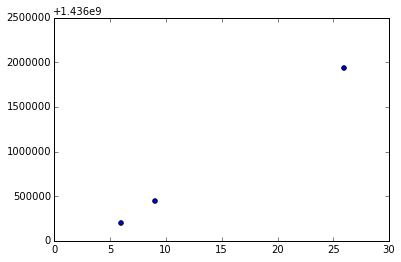

In [42]:
plt.scatter(d, id)

In [51]:
import process_data
project_df = process_data.convert_project_dict_to_dataframe(tech_projects_live)

In [62]:
in_url = lambda row, url: url in row['urls']
def strip_url(url):
    url_split = url.split('?')
    return '?'.join(url_split[:-1]) # keep any interior question marks
project_df[project_df.apply(lambda x: in_url(x, strip_url("https://www.kickstarter.com/projects/keyboardio/the-model-01-an-heirloom-grade-keyboard-for-seriou?ref=category")),axis=1)]

,project_id,backers,pledged,goal,category_id,category_name,urls,creator_id
293,2084315011,952,294907.58,120000,52,technology/hardware,https://www.kickstarter.com/projects/keyboardi...,1021362599


### Create test probabilities for frontend

In [70]:
new_df = pd.DataFrame(project_df['project_id'].copy(deep=True))
new_df['success_prob'] = np.random.uniform(size=new_df.shape)
pickle.dump(new_df,open('data/success_probabilities_tech_live_test.p','wb'))